## <center>A Melodia do Sucesso: Uma Análise das Características das Músicas Mais Tocadas no Spotify</center>

---
### Descrição da base 

O conjunto de dados obitdo a partir da plataforma **kaggle** contém uma lista das músicas mais famosas de 2023 listadas no **Spotify**. O conjunto de dados inclui informações como nome da faixa, nome do(s) artista(s), data de lançamento, listas de reprodução e classificação do **Spotify**, estatísticas de streaming, classificação do **Apple Music**, classificação do **Deezer**, classificação do **Shazam** e vários recursos de áudio.

* Base de dados: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

---
### Objetivos

Esta análise de dados têm como objetivos:
1. Observar a relação entre a quantidade de reproduções de uma música - **streams** - e os demais atributos, buscando por padrões nas músicas mais tocadas em 2023.
2. Analisar tendências temporais nas músicas contidas na base de dados.
2. Obsevar a influência das características musicais na popularidade.
3. Identificar artistas e faixas mais populares.

---
### Preparação e descrição dos dados

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [172]:
data = pd.read_csv('data\spotify-2023.csv', encoding='ISO-8859-1') 

Ao visualizar as primeiras linhas da base de dados, podemos observar que cada amostra contém 23 atributos, utilizados para descrever uma faixa específica pertencente as mais escutadas do **Spotify** no ano de 2023. Além disso, existem 953 músicas no conjunto.

In [173]:
print('\033[1mQuantidade de amostras:\033[0m', data.shape[0])
print('\033[1mQuantidade de colunas:\033[0m', data.shape[1])
data.head()

Quantidade de amostras: 953
Quantidade de colunas: 23


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,826,125,B,Major,80,89,83,31,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,382,92,C#,Major,71,61,74,7,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,949,138,F,Major,51,32,53,17,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,548,170,A,Major,55,58,72,11,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,425,144,A,Minor,65,23,80,14,11,6


Antes de começar a análise, é preciso esclarecer quais os atributos presentes e o significado de cada um:
* `track_name`: Nome da música.
* `artist(s)_name`: Nome do(s) artista(s) envolvido(s) na produção da música.
* `artist_count`: Quantidade de artistas que participaram.
* `released_year`: Ano de lançamento. 
* `released_month`: Mês de lançamento.
* `released_day`: Dia de lançamento.
* `in_spotify_playlists`: Quantidade de playlists do Spotify que possuem a música incluída.
* `in_spotify_charts`: Presença e classificação da música no ranking do Spotify.
* `streams`: Quantidade de vezes que a música foi reproduzida na plataforma.
* `in_apple_playlists`: Quantidade de playlists da Apple que possuem a música incluída.
* `in_apple_charts`: Presença e classificação da música no ranking da Apple.
* `in_deezer_playlists`: Quantidade de playlists do Deezer que possuem a música incluída.
* `in_deezer_charts`: Presença e classificação da música no ranking do Deezer.
* `in_shazam_charts`: Presença e classificação da música no ranking do Shazam.
* `bpm`: Batidas por minuto (beats per minute).
* `key`: Tonalidade da música.
* `mode`: Modo de escala da música.
* `danceability_%`: Indica o quão adequada a música é para dançar em percentual.
* `valence_%`: Representa a positividade do conteúdo musical.
* `energy_%`: Nível de energia percebido da música.
* `acousticness_%`: Quantidade de som acústico na música.
* `liveness_%`: Presença de elementos de performance ao vivo.
* `speechiness_%`: Percentual da música que possui palavras faladas e não cantadas (comum no genêro hip hop).

In [174]:
missing_data = pd.concat([data.isna().any()], axis=1)
missing_data.columns = ['Valores vazios']
display(missing_data)

,Valores vazios
track_name,False
artist(s)_name,False
artist_count,False
released_year,False
released_month,False
released_day,False
in_spotify_playlists,False
in_spotify_charts,False
streams,False
in_apple_playlists,False


A partir da célula acima, pode-se verificar que existem valores faltantes nas colunas **in_shazam_charts** e **key**. Para solucionar este problema, no caso do atributo **in_shazam_charts** esses valores serão substituidos por 0, o que indica que a música não está classificada no ranking da plataforma **Shazam**. Por sua vez, na coluna **key** será incluida a sigla N/A para mostrar que a faixa em questão não apresenta essa informação.

In [175]:
print("\033[1mValores nulos antes do tratamento:\033[0m")
print(data[['in_shazam_charts', 'key']].isnull().sum())

data['in_shazam_charts'].fillna(0, inplace=True)
data['key'].fillna('N/A', inplace=True)

print("\033[1mValores nulos após o tratamento:\033[0m")
print( data[['in_shazam_charts', 'key']].isnull().sum())

Valores nulos antes do tratamento:
in_shazam_charts    50
key                 95
dtype: int64
Valores nulos após o tratamento:
in_shazam_charts    0
key                 0
dtype: int64


In [176]:
d_types = pd.DataFrame(data.dtypes)
d_types.columns = ['Tipo']
display(d_types)

,Tipo
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


Como o atributo **streams** representa a quantidade de reproduções da música na plataforma, podemos transformá-lo no tipo numérico para realizar a análise corretamente. O mesmo ocorre para **in_deezer_playlists** e **in_shazam_charts**, que podem ser representados como números.

In [177]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')

Agora, para identificar valores extremos - **outliers** - e fornecer informações sobre a simetria da distribuição, iremos utilizar o **box plot**. Com uma representação visual das estatísticas descritivas de um conjunto, ele é usado para visualizar a distribuição dos dados e identificar padrões, variações e discrepâncias.

Para interpretar este gráfico é preciso levar em consideração o seguinte:
* A caixa central representa o intervalo interquartil, que contém a maioria dos dados. A linha no meio dessa caixa é a mediana.
* As linhas verticais (hastes) mostra a variação dos dados dentro de uma faixa específica.
* Pontos individuais fora das linhas verticais representam valores extremos, que estão significativamente distantes da maioria dos dados.

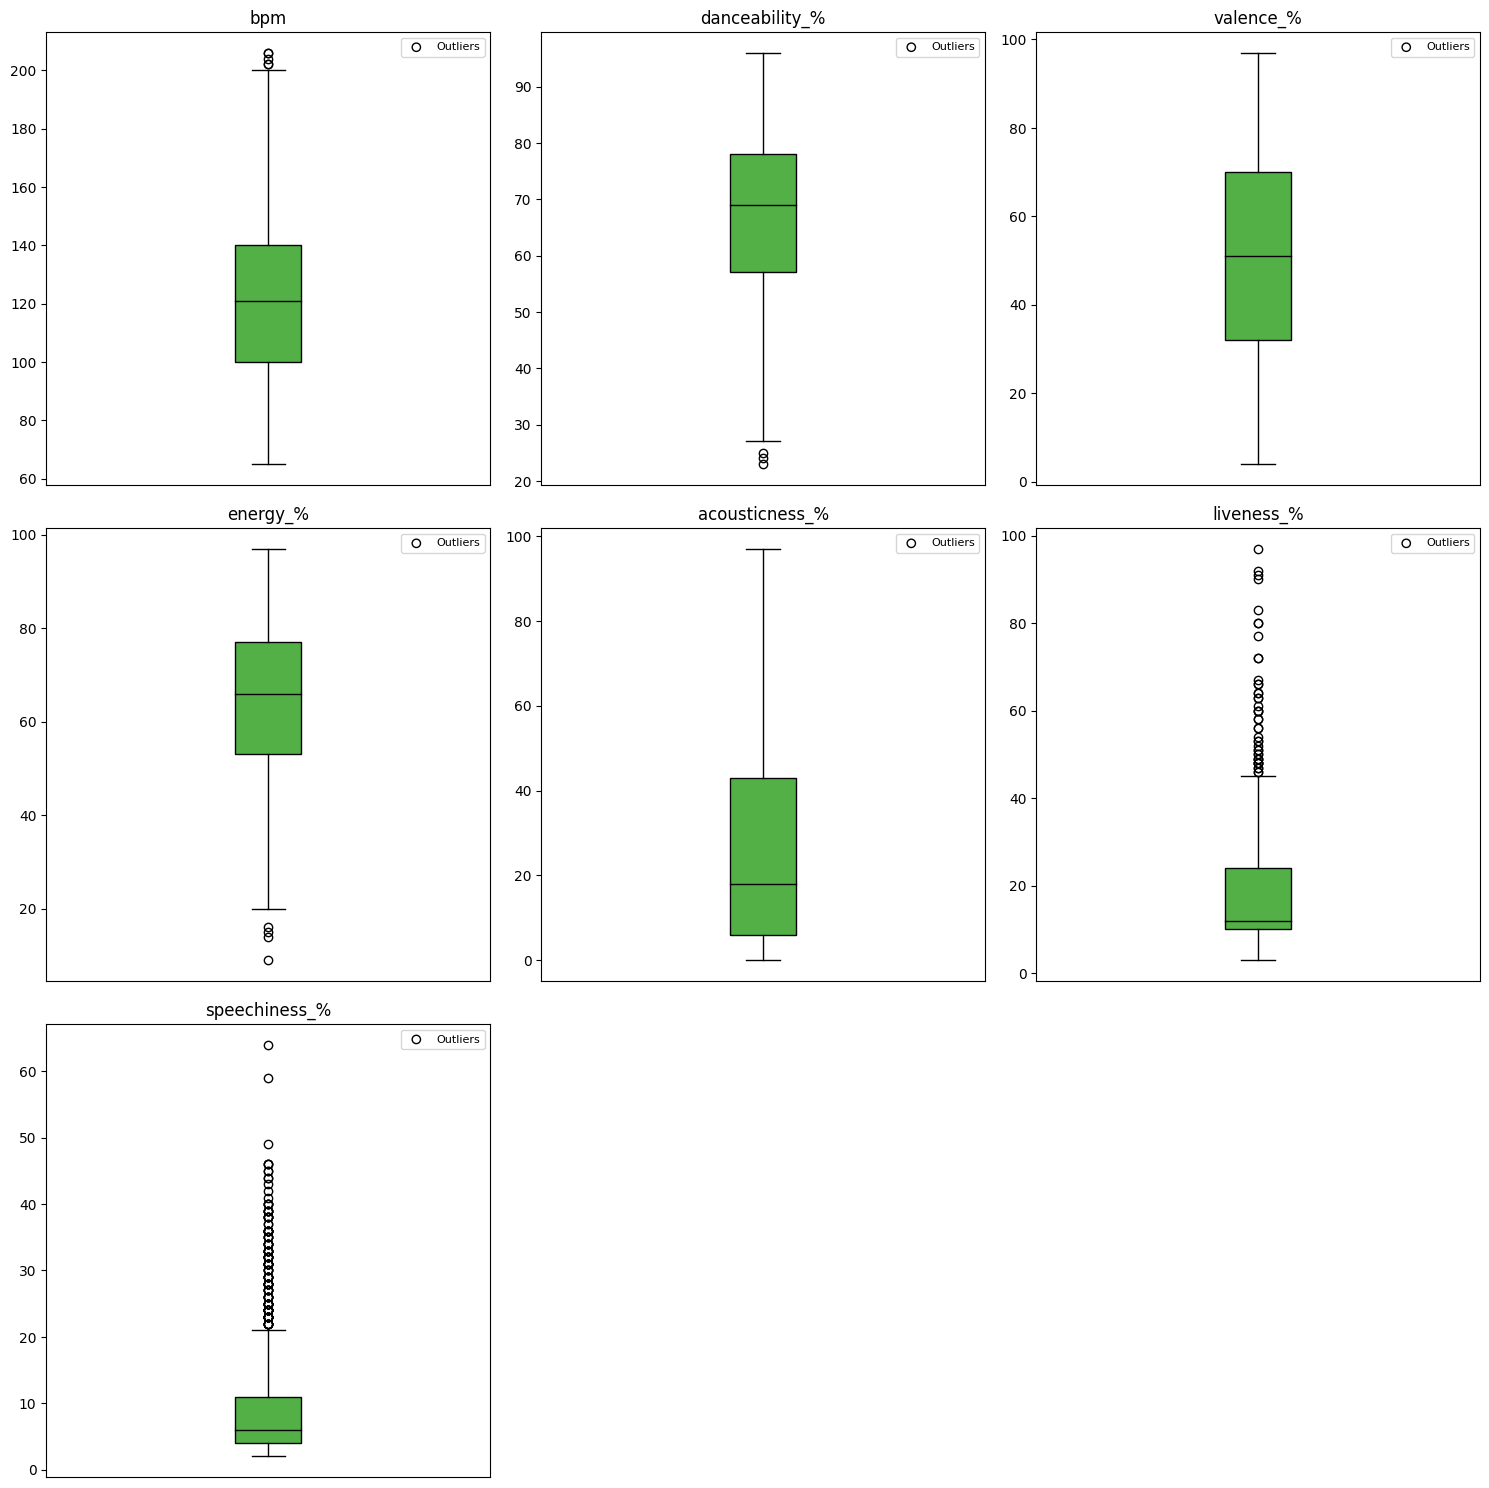

In [178]:
cols = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
n_sub = 3

fig, axs = plt.subplots(n_sub, n_sub, figsize=(15, 15))
fig.delaxes(axs[n_sub - 1, n_sub - 1])
fig.delaxes(axs[n_sub - 1, n_sub - 2])

for i, name in enumerate(cols):
    c = i % n_sub
    r = i // n_sub
    
    bp = axs[r, c].boxplot(data[name],  patch_artist=True, medianprops=dict(color='black'))

    for box in bp['boxes']:
        box.set(facecolor='#53B046')

    axs[r, c].set_title(name)
    axs[r, c].scatter([], [], color='black', label='Outliers', marker='o', facecolors='none', edgecolors='black') 
    axs[r, c].legend(loc='upper right', fontsize=8)
    axs[r, c].xaxis.set_visible(False)

plt.tight_layout()
plt.show()

Nos diversos box plots exibidos, os atributos **speechiness_%** (percentual de palavras faladas) e **liveness_%** (percentual de elementos de performance ao vivo) se destacam pela presença significativa de valores extremos, comumente chamados de **outliers**.

Em situações onde os dados possuem uma distribuição assimétrica ou apresentam valores extremos - **outliers** -, a mediana é frequentemente preferida para analisar os dados em relação a média. Isso ocorre, pois ela é mais robusta do que a média em tais situações.

In [179]:
median = pd.DataFrame(data.select_dtypes(include='number').median())
median.columns = ['Mediana']
display(median)

,Mediana
artist_count,1.0
released_year,2022.0
released_month,6.0
released_day,13.0
in_spotify_playlists,2224.0
in_spotify_charts,3.0
streams,290530915.0
in_apple_playlists,34.0
in_apple_charts,38.0
in_deezer_playlists,36.5


In [180]:
data.describe().round(3)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
count,953.000,953.000,953.000,953.000,953.000,953.000,9.520000e+02,953.000,953.000,874.000,953.000,946.000,953.000,953.000,953.000,953.000,953.000,953.000,953.000
mean,1.556,2018.238,6.034,13.931,5200.125,12.009,5.141374e+08,67.812,51.909,109.740,2.666,48.471,122.540,66.970,51.431,64.279,27.058,18.213,10.131
std,0.893,11.116,3.566,9.202,7897.609,19.576,5.668569e+08,86.441,50.630,178.811,6.036,123.628,28.058,14.631,23.481,16.551,25.996,13.711,9.913
min,1.000,1930.000,1.000,1.000,31.000,0.000,2.762000e+03,0.000,0.000,0.000,0.000,0.000,65.000,23.000,4.000,9.000,0.000,3.000,2.000
25%,1.000,2020.000,3.000,6.000,875.000,0.000,1.416362e+08,13.000,7.000,12.000,0.000,0.000,100.000,57.000,32.000,53.000,6.000,10.000,4.000
50%,1.000,2022.000,6.000,13.000,2224.000,3.000,2.905309e+08,34.000,38.000,36.500,0.000,2.000,121.000,69.000,51.000,66.000,18.000,12.000,6.000
75%,2.000,2022.000,9.000,22.000,5542.000,16.000,6.738690e+08,88.000,87.000,110.000,2.000,32.750,140.000,78.000,70.000,77.000,43.000,24.000,11.000
max,8.000,2023.000,12.000,31.000,52898.000,147.000,3.703895e+09,672.000,275.000,974.000,58.000,953.000,206.000,96.000,97.000,97.000,97.000,97.000,64.000


---
### Análise de correlação

A matriz de correlação é uma tabela que mede o relacionamento entre atributos de um conjunto de dados através do coeficente de correlação. Esse coeficiente, que varia de -1 a 1, mede a força e a direção da relação entre duas variáveis:
* O valor 1 indica uma correlação positiva perfeita. À medida que um atributo aumenta, o outro também aumenta na mesma proporção.
* O valor -1 indica uma correlação negativa perfeita. À medida que um atributo aumenta, o outro diminui na mesma proporção.
* O valor 0 indica uma ausência de correlação, em que não há relação nenhuma entre os dois atributos.

Essa tabela é muito útil para identificar padrões gerais e relações positivas e negativas entre os atributos, porém é importante ressaltar que correlação não implica causalidade. Isto é, a existência de uma correlação entre duas variáveis não significa necessariamente que uma causa a outra.

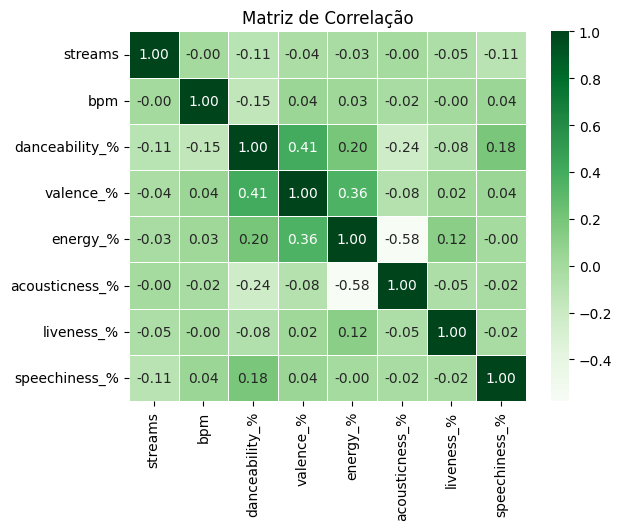

In [181]:
cols = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
correlations = data[cols].corr()

sns.heatmap(correlations, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Com base na matriz de correlação acima, nenhum dos atributos apresentou uma relação significativa com a variável alvo **streams**. Isso não significa necessariamente que nenhum atributo tenha influência na quantidade de vezes que a música é executada, pois a correlação mede apenas o grau de relacionamento linear entre dois atributos e não captura outros tipos de relações complexas que podem existir entre eles.

Cabe destacar que algumas colunas da base de dados apresentaram uma certa associação entre si, como a **energy_%** e **acousticness_%**. 

Na tabela abaixo, ao analisar a relação entre o número de **streams** e o número de playlists em que uma música está presente nas diferentes plataformas musicais, observamos uma evidente correlação entre todos os atributos. Essa associação era esperada, uma vez que a inclusão de uma música em playlists pode influenciar diretamente sua exposição aos usuários e, consequentemente, o número de visualizações que ela recebe. Esse alto grau de relacionamento sugere que a presença em playlists pode desempenhar um papel significativo no sucesso e na popularidade da obra.

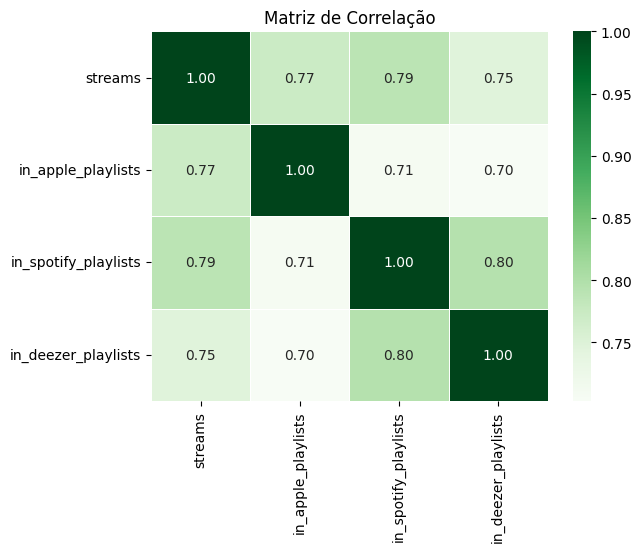

In [182]:
cols = ['streams', 'in_apple_playlists', 'in_spotify_playlists', 'in_deezer_playlists']
correlations = data[cols].corr()

sns.heatmap(correlations, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

---
### Explorando a influência das características musicais na popularidade

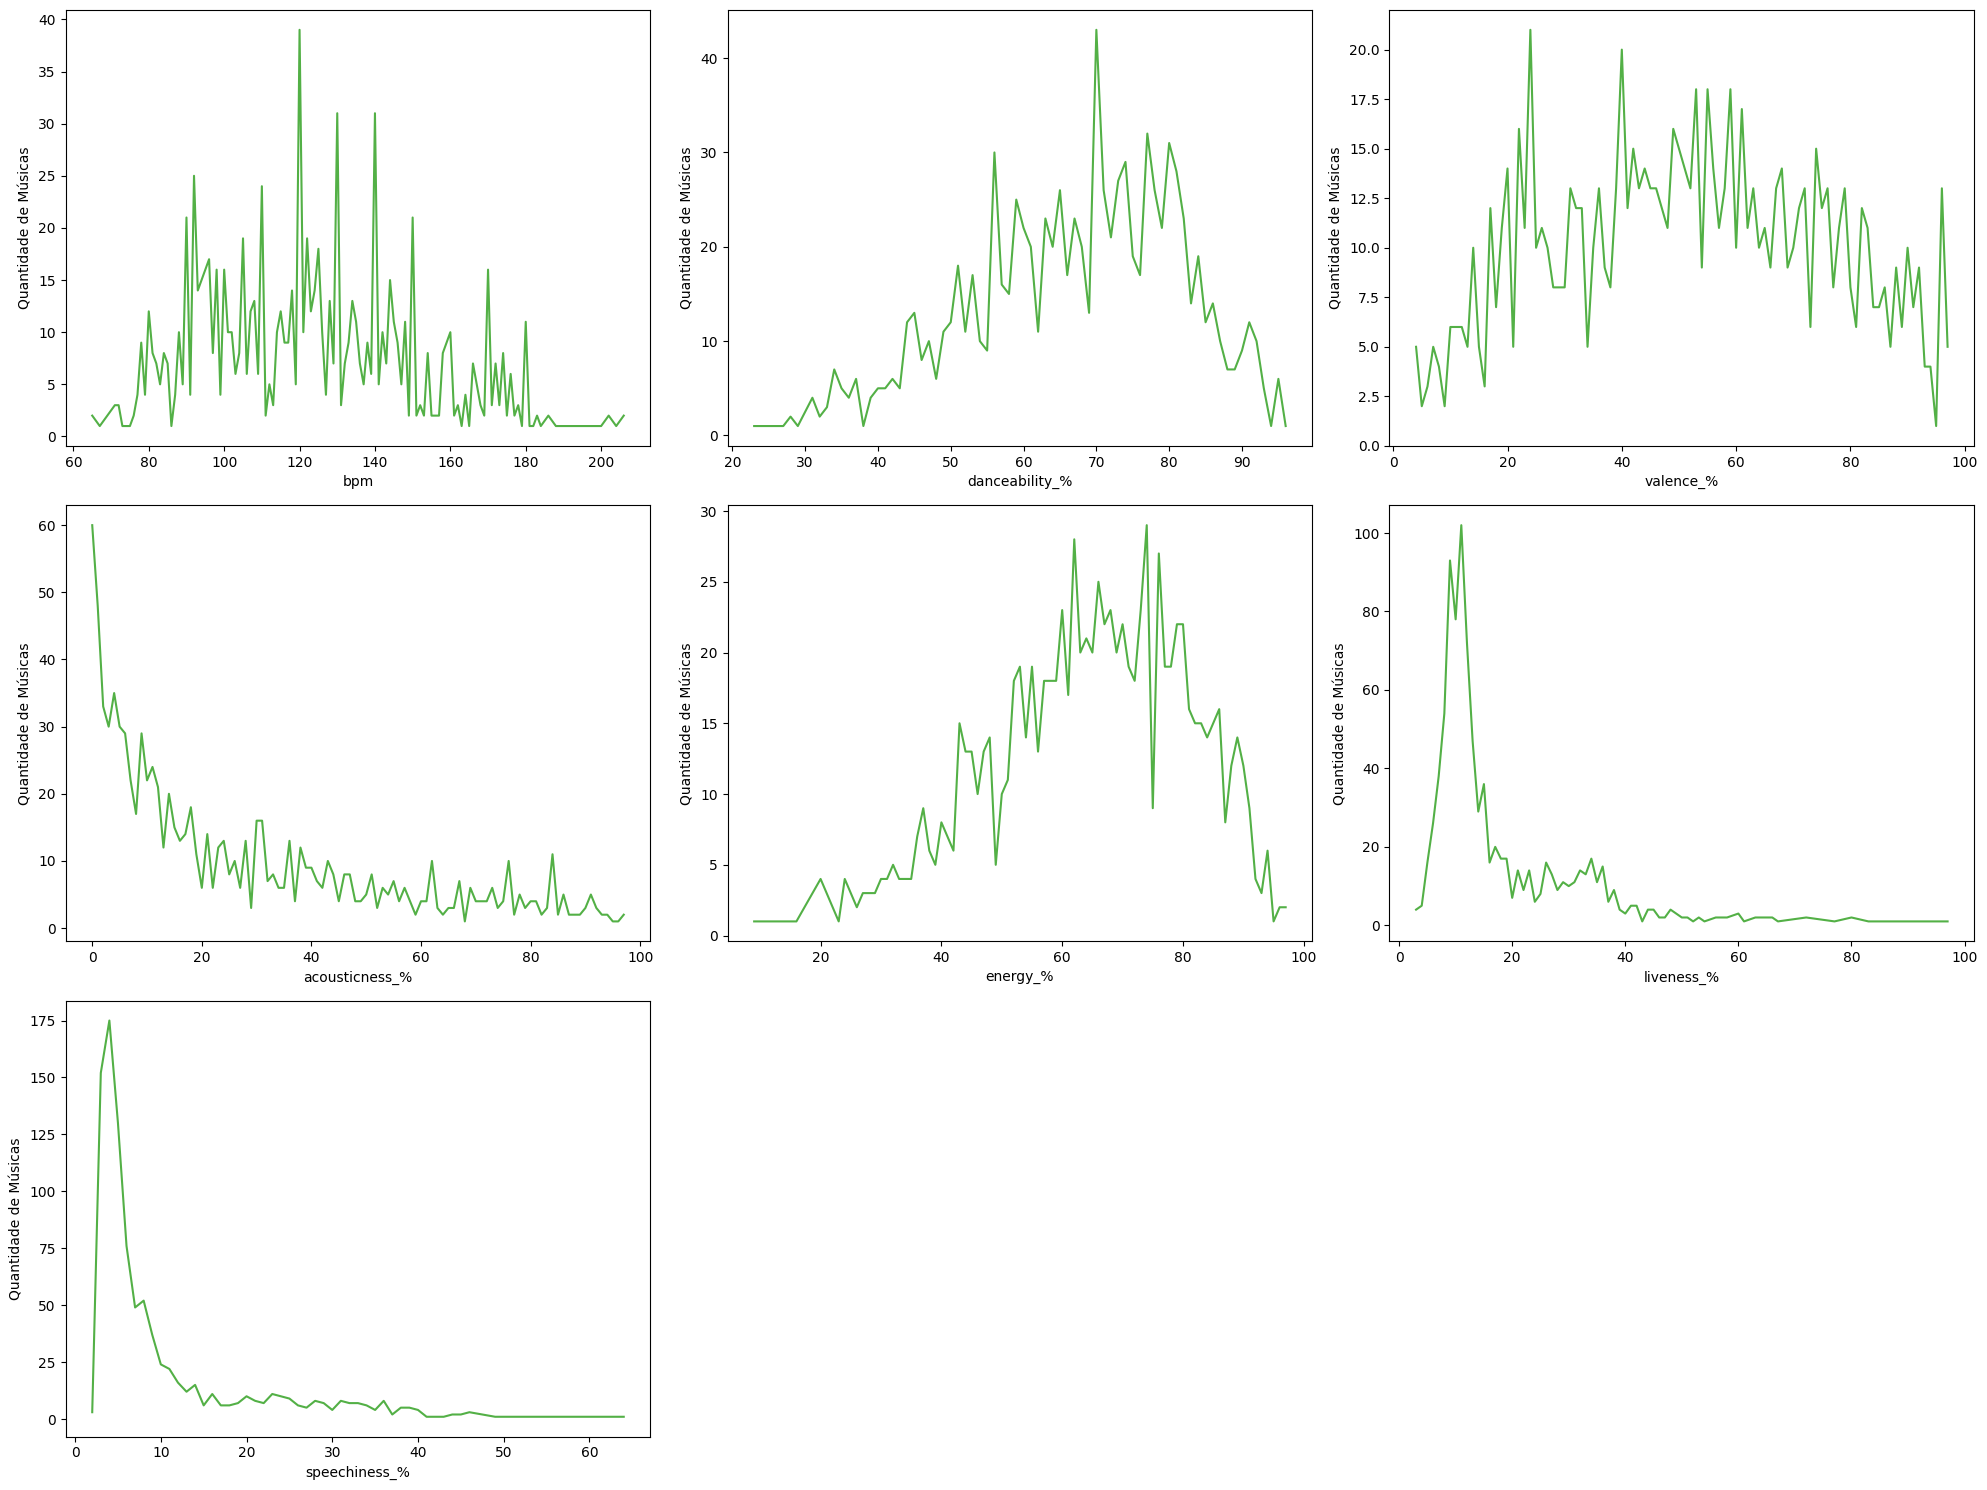

In [183]:
cols = ['bpm', 'danceability_%', 'valence_%', 'acousticness_%', 'energy_%', 'liveness_%', 'speechiness_%']

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.delaxes(axs[2, round(len(cols) / 3) - 1])
fig.delaxes(axs[2, round(len(cols) / 3)])

for i, c in enumerate(cols):
    counts = data[c].value_counts().sort_index()
    
    axs[i // 3, i % 3].plot(counts.index, counts.values, color='#53B046')
    axs[i // 3, i % 3].set_xlabel(c)
    axs[i // 3, i % 3].set_ylabel('Quantidade de Músicas')

plt.tight_layout()
plt.show()

Os diferentes gráficos acima ilustram a relação entre um atributo específico (eixo x) e a quantidade de músicas (eixo y). Cada gráfico representa a distribuição da quantidade de músicas em relação aos valores do atributo correspondente. Alguns deles não apresentam padrões claros a serem avaliados, porém em dois gráficos foram identificados resultados interessantes:
* `liveness_%` (percentual de elementos de performance ao vivo): Como apresentado no gráfico, músicas mais populares tendem a possuir uma quantidade moderada de presença de elementos ao vivo, como sons de plateia e aplausos. Isso também pode ser verificado na mediana deste atributo, que apresenta o valor 12.
* `speechiness_%` (percentual de palavras faladas): Ao analisar as faixas mais reproduzidas, observa-se que a maioria delas possui um percentual de palavras faladas inferior a 20%. Com uma mediana igual a 6 no atributo, isso sugere uma tendência predominante em palavras cantadas nas músicas mais reproduzidas.

Nos gráficos de distribuição a seguir, que mostram a relação da quantidade de reproduções - **streams** - e os atributos **liveness_%** e **speechiness_%**, pode-se ver que as faixas mais bem sucedidas também possuem os padrões apresentados acima.

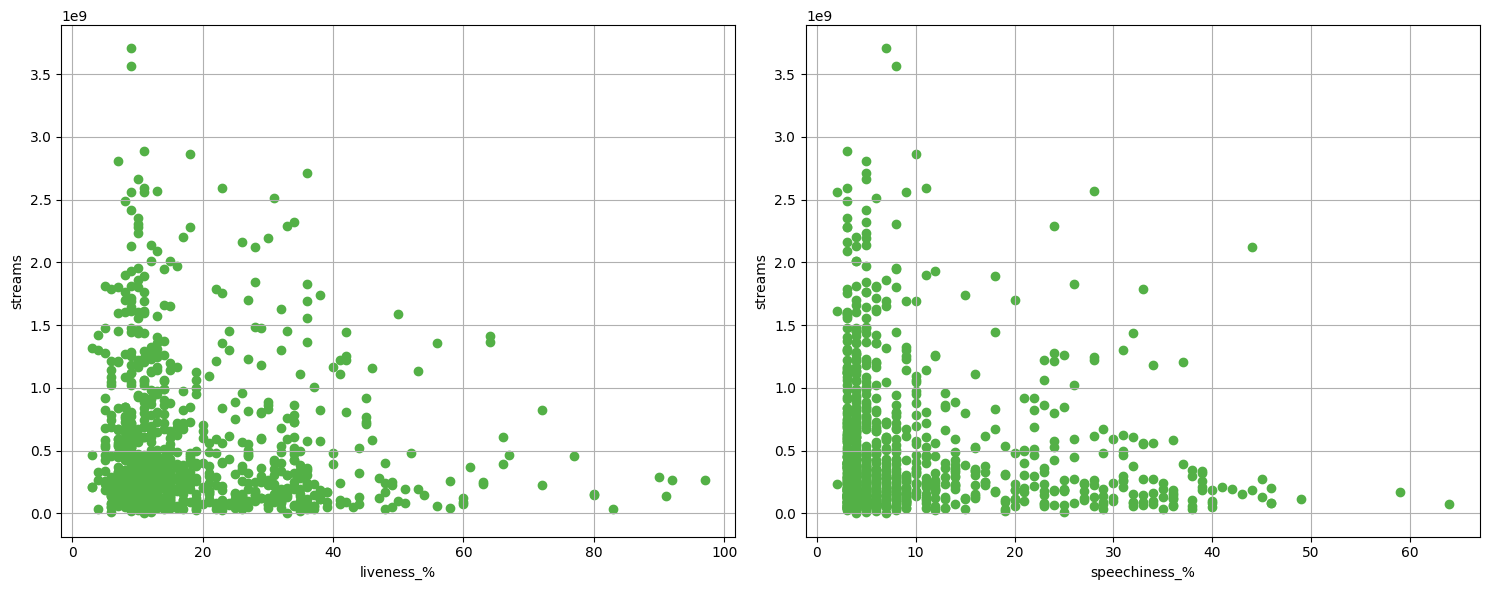

In [184]:
import matplotlib.pyplot as plt

cols = ['liveness_%', 'speechiness_%']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for i, c in enumerate(cols):
    axs[i].scatter(data[c], data['streams'], color='#53B046')
    axs[i].set_xlabel(c)
    axs[i].set_ylabel('streams')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

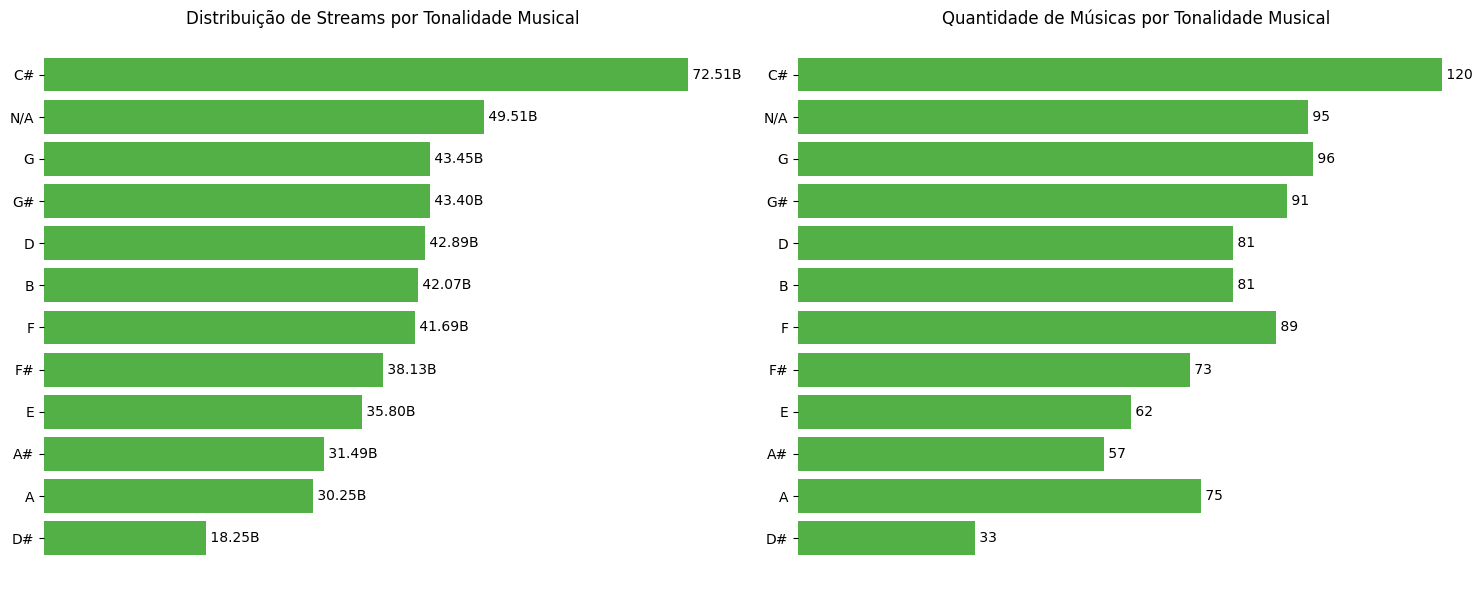

In [185]:
key_streams = data.groupby('key')['streams'].sum()
key_streams = key_streams.sort_values(ascending=False)
num_keys = len(key_streams)

# Criar o primeiro gráfico
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 linha, 2 colunas

# Gráfico 1: Distribuição de Streams por Tonalidade Musical
axs[0].barh(key_streams.index[::-1], key_streams.values[::-1], color='#53B046')
axs[0].xaxis.set_visible(False)

# Adicionar as quantidades de streams em frente a cada barra
for i, value in enumerate(key_streams.values[::-1]):
    axs[0].text(value, i, f' {(value / 1e9):.2f}B', va='center')

axs[0].set_title('Distribuição de Streams por Tonalidade Musical')
axs[0].set_ylabel('')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Calcular a contagem de músicas para cada tonalidade musical
key_counts = data['key'].value_counts()

# Ordenar a contagem de músicas de acordo com a ordem das tonalidades musicais da distribuição de streams
key_counts = key_counts.reindex(key_streams.index)

# Gráfico 2: Quantidade de Músicas por Tonalidade Musical
axs[1].barh(key_counts.index[::-1], key_counts.values[::-1], color='#53B046')
axs[1].xaxis.set_visible(False)

# Adicionar os valores em frente a cada barra
for i, value in enumerate(key_counts.values[::-1]):
    axs[1].text(value, i, ' ' + str(value), va='center')

axs[1].set_title('Quantidade de Músicas por Tonalidade Musical')
axs[1].set_ylabel('')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

A coluna **key** refere-se a tonalidade da música, ou seja, a nota musical principal em que ela está centrada. Representada por letras do alfabeto de A a G, essas chaves musicais são importantes pois afetam a sonoridade geral da música e influenciam em aspectos como a melodia, harmonia e emoção transmitida por ela. A partir da base de dados, a nota que possui a maior quantidade de reproduções e também a maior quantidade de músicas têm tonalidade **C#**, que representa um dó sustenido.

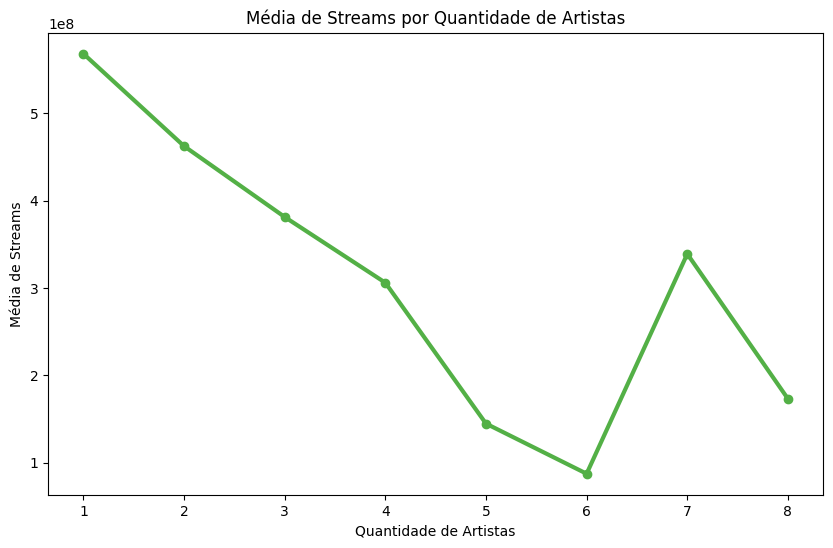

In [186]:
artist_streams_mean = data.groupby('artist_count')['streams'].mean()

plt.figure(figsize=(10, 6))
artist_streams_mean.plot(marker='o', linestyle='-', color='#53B046', linewidth=3)

plt.title('Média de Streams por Quantidade de Artistas')
plt.xlabel('Quantidade de Artistas')
plt.ylabel('Média de Streams')
plt.show()

In [187]:
artist_count_distribution = pd.DataFrame(data['artist_count'].value_counts().sort_index())
artist_count_distribution = artist_count_distribution.rename_axis('Artista(s)')
artist_count_distribution.columns = ['Quantidade de Músicas']
display(artist_count_distribution)

,Quantidade de Músicas
Artista(s),
1,587
2,254
3,85
4,15
5,5
6,3
7,2
8,2


Analisando o gráfico **Média de Streams por Quantidade de Artistas**, podemos notar uma tendência interessante. Existe um claro movimento de baixa na quantidade média de **streams** entre as músicas de 1 a 6 artistas, seguida por um aumento moderado para 7 e, novamente, queda para 8 artistas. Entretanto, é preciso destacar que poucas músicas da base de dados foram produzidas com mais do que 4 colaboradores, o que pode impactar na análise.

---
### Tendências temporais

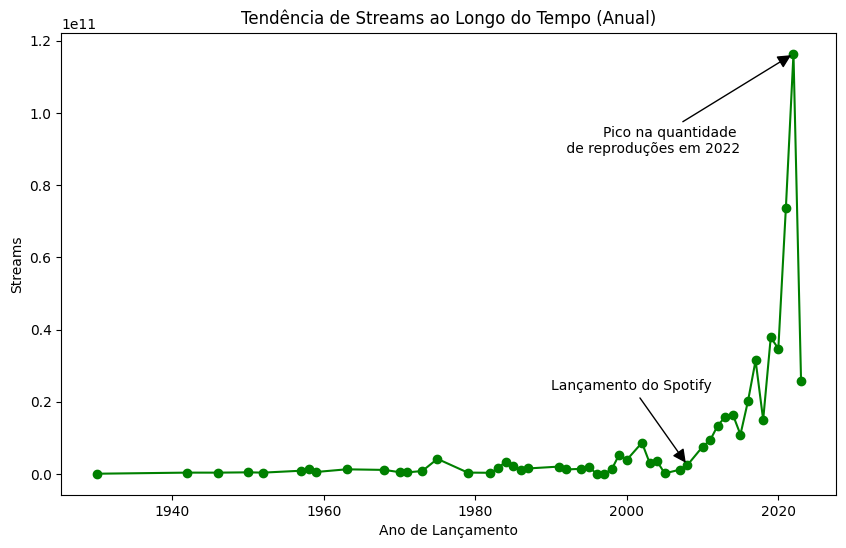

In [188]:
# Convertendo as colunas de data para o formato datetime
data['release_date'] = pd.to_datetime(data['released_year'].astype(str) + '-' + data['released_month'].astype(str) + '-' + data['released_day'].astype(str))

# Agrupando os dados por ano e calculando a soma dos streams para cada ano
streams_yearly = data.groupby(data['release_date'].dt.year)['streams'].sum()

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
streams_yearly.plot(marker='o', color='g', linestyle='-')
plt.title('Tendência de Streams ao Longo do Tempo (Anual)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Streams')


plt.annotate('Pico na quantidade \n de reproduções em 2022',
      horizontalalignment = 'right',
      verticalalignment = 'top',
      xytext=(2015, streams_yearly.loc[2022] - 0.2e11),
      xy=(2022, streams_yearly.loc[2022]),
      arrowprops = dict(facecolor = 'black', mutation_scale=20, arrowstyle='-|>'))

plt.annotate('Lançamento do Spotify',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext=(1990, streams_yearly.loc[2008] + 0.2e11),
      xy=(2008, streams_yearly.loc[2008]),
      arrowprops = dict(facecolor = 'black', mutation_scale=20, arrowstyle='-|>'))

plt.show()

Ao longo do tempo, com base na análise da tendência de **streams**, fica evidente o grande aumento no número de reproduções das músicas lançadas a partir do ano de 2008 em relação a músicas que foram apresentadas previamente. Isso possivelmente ocorre devido aos avanços significativos na tecnologia e popularidade da internet e criação das plataformas de streaming de música, que facilitaram o acesso das pessoas às músicas de forma online. As plataformas **Deezer** e **Spotify**, por exemplo, foram fundadas respectivamente em 2007 e 2008.

Além disso, destaca-se o pico observado no ano de 2022, o qual registrou o maior número de reproduções na série temporal analisada.

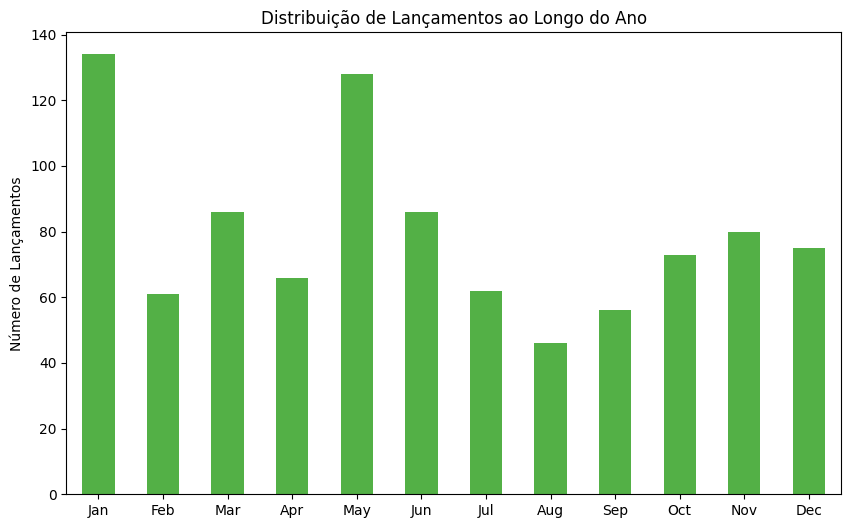

In [189]:
# Contagem de lançamentos por mês
monthly_release_counts = data['released_month'].value_counts().sort_index()

# Mapear os números dos meses para os nomes abreviados
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
monthly_release_counts.index = month_names

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
monthly_release_counts.plot(kind='bar', color='#53B046')
plt.title('Distribuição de Lançamentos ao Longo do Ano')
plt.ylabel('Número de Lançamentos')
plt.xticks(rotation=0)
plt.show()

Identificar os meses com maior atividade de lançamentos pode ajudar os artistas e as gravadoras a planejar estratégias de marketing mais eficazes. Como mostrado na figura, **janeiro** e **maio** foram os meses que apresentaram o maior número de lançamentos. Por outro lado, **agosto** foi o mês que mostrou a menor quantidade. 

---
### Top 10 músicas e artistas mais populares

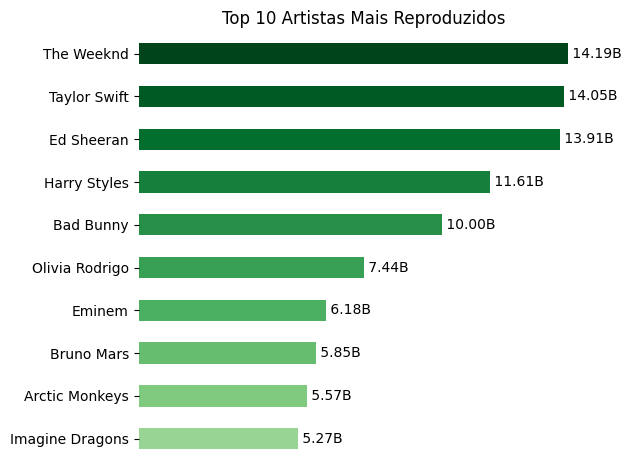

In [190]:
artist_streams = data.groupby('artist(s)_name')['streams'].sum()
top_10_artists = artist_streams.sort_values(ascending=False).head(10)
num_artists = len(top_10_artists)

colors = plt.cm.Greens(np.linspace(0.4, 1, num_artists))
ax = top_10_artists[::-1].plot(kind='barh', color=colors)
ax.xaxis.set_visible(False)

for i, value in enumerate(top_10_artists.values[::-1]):
    plt.text(value, i, f' {(value / 1e9):.2f}B', va='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Top 10 Artistas Mais Reproduzidos')
plt.ylabel('')
plt.tight_layout()
plt.show()

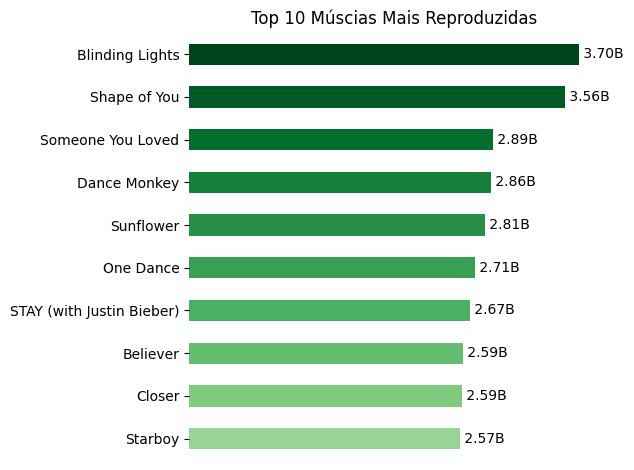

In [191]:
music_streams = data.groupby('track_name')['streams'].sum()
top_10_musics = music_streams.sort_values(ascending=False).head(10)
top_10_musics.rename(index={'Sunflower - Spider-Man: Into the Spider-Verse': 'Sunflower'}, inplace=True)

ax = top_10_musics[::-1].plot(kind='barh', color=colors)
ax.xaxis.set_visible(False)

for i, value in enumerate(top_10_musics.values[::-1]):
    plt.text(value, i, f' {(value / 1e9):.2f}B', va='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Top 10 Múscias Mais Reproduzidas')
plt.ylabel('')
plt.tight_layout()
plt.show()

---
### Conclusão

A análise dos dados das músicas mais populares no Spotify em 2023 revelou insights interessantes sobre as tendências e características dessas músicas. Ao examinar a influência das características musicais na popularidade, foi revelado que **as faixas mais famosas possuem um percentual baixo de elementos ao vivo e fala**.

A análise temporal também revelou tendências interessantes. **Houve um aumento significativo na quantidade de reproduções de músicas a partir de 2008**, o que pode ter relação com o surgimento de plataformas de streaming, como **Deezer** e **Spotify**, e o aumento na popularidade da internet. Também, destaca-se o ano de 2022, que registrou o pico na quantidade de reproduções.

Além disso, ao explorar a distribuição de lançamentos ao longo do ano, identificamos que **janeiro e maio foram os meses com maior atividade de lançamentos, enquanto agosto registrou o menor número de novas músicas lançadas**.

Por fim, foram identificados os 10 artistas e músicas mais populares com base no número total de **streams**, informações úteis para entender quais artistas e faixas dominaram a cena musical em 2023.

Em resumo, este projeto buscou fornecer um melhor entendimento sobre as características das músicas mais populares do **Spotify** presentes no conjunto de dados, analisar tendências temporais e apresentar os artistas e faixas mais reproduzidas.